In [84]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
import pandas as pd

iris = datasets.load_iris()
iris_data = iris.data #seperate training variables
iris_labels = iris.target #what we are predicting

In [85]:
pd.DataFrame(iris_data).head(5)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [86]:
np.random.seed(42) #randomize data
indices = np.random.permutation(len(iris_data))
n_training_samples = 12
trainset_data = iris_data[indices[:-n_training_samples]]
trainset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]

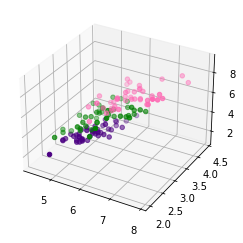

In [87]:
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(trainset_data)):
        if trainset_labels[i] == iclass:
            X[iclass][0].append(trainset_data[i][0])
            X[iclass][1].append(trainset_data[i][1])
            X[iclass][2].append(sum(trainset_data[i][2:]))
        
colors = ("indigo", "g", "hotpink")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for iclass in range(3):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colors[iclass])
plt.show()
            

In [88]:
def distance(instance1, instance2):
    
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)

In [89]:
def get_neighbors(training_set,
                 labels,
                 test_instance,
                 k,
                 distance=distance):
    distances=[]
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return(neighbors)

In [90]:
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [91]:
for i in range(n_training_samples):
    neighbors = get_neighbors(trainset_data,
                             trainset_labels,
                             testset_data[i],
                             3,
                             distance=distance)
    print("index: ", i, 
         ", result of vote: ", vote(neighbors),
         ", label: ", testset_labels[i],
         ", data: ", testset_data[i])

index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]


In [92]:
#1.What was the overall accuracy of the model?
#11/12 = 92% when n_training_samples = 12


#2.What was the accuracy of each type of iris?
# label0 = 2/2 = 100%
# label1 = 5/5 = 100%
# label2 = 4/5 = 80%

#3.Would you classify the model as a good model or not?
# I think it is a good model because overall accuracy is 92%, which is 
#much larger than 65%-70%(good target)
# even if when n_training_samples = 5 the overall accuracy is still 80%.
# In the visualization, we can see there are some overlaps between one and two(green and yellow). Therefore, the model is hard to predict accurately between these two labels.
# With the nature of trainning datasets, it is pretty good that we have a 92% accuracy.